In [ ]:
!pip install openai

In [ ]:
import json
import pandas as pd
import re
from datetime import datetime
import seaborn as sns
import sqlite3

# Other Things to Investigate

- Analytics environment
  - [Athena Intelligence | Platform Overview | April 2024](https://youtu.be/uwoeoMAVIiE) - This is the product that JW sent originally from Silas
  - [Bokeh](https://youtu.be/VFpfZz6w9Oo?list=PL8eNk_zTBST-AwsJnOSxJGDf7jCMVIvXT)
    - [Interactive Data Visualization in Python With Bokeh](https://realpython.com/python-data-visualization-bokeh/)
- VSCode as an Analytics Environment
  - [How To Setup & Run Jupyter Notebooks in VS Code w/ Virtual Environment & Kernels (Remote & Local)](https://youtu.be/-j6y-5t37os)
  - [Why I stopped using Jupyter Notebooks](https://youtu.be/qFvInA7DKuE) - Interesting in the sense, can [VS Code online](https://vscode.dev/) be used the way this dude is using it.  This is [his dev enviroment](https://youtu.be/zulGMYg0v6U).
  - [VS Code for the Web: vscode.dev](https://youtu.be/hdNipVZK53A) - So cool how you [can prefix a repo with vscode.dev](https://youtu.be/hdNipVZK53A?t=66)
  - [How to use VS Code from ANYWHERE](https://youtu.be/q2viJSYyKio) - VSCode Server!!!
  - [5 things you had no idea you could do with Jupyter Notebooks](https://youtu.be/QJo57-pmcuM)
  - [Jupyter Notebooks in VS Code Walkthrough](https://youtu.be/DA6ZAHBPF1U)
- Tabular
  - [Chat with SQL and Tabular Databases using LLM Agents (DON'T USE RAG!)](https://youtu.be/ZtltjSjFPDg)
  - [OpenAI Chat with Excel CSV using LangChain](https://www.youtube.com/watch?v=nr-mDSi9LxA)
  - [Talk to your CSV & Excel with LangChain](https://www.youtube.com/watch?v=xQ3mZhw69bc) - Uses LangChain agents to ask questions of data.  Its year old but interesting in the sense that the same thing is probably possible against sqlite.
  - [Chat with MySQL Database using GPT-4 and Mistral AI | Python GUI App](https://youtu.be/YqqRkuizNN4)
- Fine Tuning
  - [Fine-Tuning GPT-3.5 on Custom Dataset: A Step-by-Step Guide | Code](https://www.youtube.com/watch?v=YioMpE2jGIU) - This code does prediction so probably no need to create a validation dataset. ([blog](https://blog.futuresmart.ai/fine-tuning-gpt-35-a-step-by-step-guide#heading-install-openai-library))
  - [Prompt Engineering, RAG, and Fine-tuning: Benefits and When to Use](https://youtu.be/YVWxbHJakgg)

### Tidbits

- [DevExpress PivotGrid](https://js.devexpress.com/React/Demos/WidgetsGallery/Demo/PivotGrid/Overview/MaterialBlueLight/) - This is where you go the sales data.

# Developing Apps with GPT-4 and ChatGPT, 2nd Edition ([ebook](https://learning.oreilly.com/library/view/developing-apps-with/9781098168094/))


## Chapter 2 - A Deep Dive into the OpenAI API ([chapter](https://learning.oreilly.com/library/view/developing-apps-with/9781098168094/ch02.html#essential_concepts), [GPT-4o playground](https://platform.openai.com/playground/chat?models=gpt-4o))

### Trying GPT Models with the OpenAI Playground ([GPT-4o playground](https://platform.openai.com/playground/chat?models=gpt-4o))

In [ ]:
!pip install openai

In [ ]:
from openai import OpenAI
from google.colab import userdata
import pandas as pd

api_key = userdata.get('OPENAI_KEY')
client = OpenAI(api_key=api_key)

In [ ]:
model = "gpt-4o"
system_message_cat_lover = {
  "role": "system",
  "content": [
    {
      "text": "You are a helpful assistant that likes cats.  In each of your answers, you have to speak about cats.   Give short answers of a maximum of 15 words",
      "type": "text"
    }
  ]
}

def chat_completion(prompt, model=model, temperature=0):
    res = client.chat.completions.create(model=model, messages=[{"role": "user", "content": prompt}], temperature=temperature,)
    print(res.choices[0].message.content)

In [ ]:

response = client.chat.completions.create(
  model=model,
  messages= [
    system_message_cat_lover,
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "Tell me about maine coon cats"
        }
      ]
    }
  ],
  temperature=1,
  max_tokens=2048,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  response_format={
    "type": "text"
  }
)

print(response.choices[0].message.content)

Maine Coon cats are large, fluffy, and friendly, with tufted ears and bushy tails.


## Chapter 4. Advanced LLM Integration Strategies with OpenAI ([chapter](https://learning.oreilly.com/library/view/developing-apps-with/9781098168094/ch04.html))

### Prompt Engineering

### Fine-Tuning ([section](https://learning.oreilly.com/library/view/developing-apps-with/9781098168094/ch04.html#:-:text=Fine-Tuning))

#### Generating and Fine-Tuning Synthetic Data for an Email Marketing Campaign ([section](https://learning.oreilly.com/library/view/developing-apps-with/9781098168094/ch04.html#:-:text=Generating%20and%20Fine-Tuning%20Synthetic%20Data%20for%20an%20Email%20Marketing%20Campaign), [source](https://github.com/malywut/gpt_examples/blob/main/Chap4_02_FineTuning/run.ipynb))

In [ ]:
l_sector = ['Grocery Stores'] #, 'Restaurants', 'Fast Food Restaurants', 'Pharmacies', 'Service Stations (Fuel)', 'Electronics Stores', 'Taxi service']
l_city = ['Brussels', 'Paris', 'Bujumbura', 'Berlin', 'Santiago']
l_size = ['small', 'medium', 'large']

f_sub_prompt = "{sector}, {city}, {size}"

In [ ]:
f_prompt = """
Role: You are an expert content writer with extensive direct marketing
experience. You have strong writing skills, creativity, adaptability to
different tones and styles, and a deep understanding of audience needs and
preferences for effective direct campaigns.
Context: You have to write a short message in no more than 2 sentences for a
direct marketing campaign to sell a new ecommerce payment service to stores.
The target stores have the following three characteristics:
- The sector of activity: {sector}
- The city where the stores are located: {city}
- The size of the stores: {size}
Task: Write a short message for the direct marketing campaign. Use the skills
defined in your role to write this message! It is important that the message
you create takes into account the product you are selling and the
characteristics of the store you are writing to.
"""

In [ ]:
df = pd.DataFrame()
for sector in l_sector:
 for city in l_city:
  for size in l_size:
   for i in range(3): ## 3 times each
    prompt = f_prompt.format(sector=sector, city=city, size=size)
    sub_prompt = f_sub_prompt.format(sector=sector, city=city, size=size)

    response_txt = chat_completion(prompt=prompt, temperature=1)

    new_row = {'prompt':sub_prompt, 'completion':response_txt}
    new_row = pd.DataFrame([new_row])
    df = pd.concat([df, new_row], axis=0, ignore_index=True)

df.to_csv("out_openai_completion.csv")

Boost your Brussels grocery store's sales with our new eCommerce payment service—simple, secure, and perfect for small shops like yours. Join today and offer your customers a flawless checkout experience they'll love!
Boost your Brussels grocery business with our seamless e-commerce payment service tailored for small shops – simplify transactions, attract more local customers, and grow your sales effortlessly!
Boost your Brussels grocery store's sales and customer satisfaction with our seamless, secure eCommerce payment service designed specifically for small businesses like yours. Sign up today and watch your profits grow effortlessly!
Boost your Brussels grocery store's efficiency with our new e-commerce payment service—simplify transactions, reduce wait times, and enhance customer satisfaction effortlessly today!
Boost your Brussels grocery store's checkout speed and customer satisfaction with our seamless new ecommerce payment service—designed specifically for medium-sized stores l

# Fine Tuning Playground Exploration

In [ ]:
!pip install openai

In [ ]:
import json
import pandas as pd
import re
from datetime import datetime
import seaborn as sns
import sqlite3

db_name = 'sales.db'

CREATE TABLE "sale" (
"id" INTEGER,
  "region" TEXT,
  "country" TEXT,
  "city" TEXT,
  "amount" INTEGER,
  "date" TIMESTAMP,
  "year" INTEGER
)


,id,region,country,city,amount,date,year
0,10248,North America,United States of America,New York,1740,2013-01-06 00:00:00,2013
1,10249,North America,United States of America,Los Angeles,850,2013-01-13 00:00:00,2013
2,10250,North America,United States of America,Denver,2235,2013-01-07 00:00:00,2013
3,10251,North America,Canada,Vancouver,1965,2013-01-03 00:00:00,2013
4,10252,North America,Canada,Edmonton,880,2013-01-10 00:00:00,2013
...,...,...,...,...,...,...,...
636,10884,Australia,Australia,Sydney,2620,2015-05-17 00:00:00,2015
637,10885,Australia,Australia,Melbourne,2400,2015-05-21 00:00:00,2015
638,10886,Africa,South Africa,Pretoria,1740,2015-05-21 00:00:00,2015
639,10887,Africa,Egypt,Cairo,500,2015-05-26 00:00:00,2015


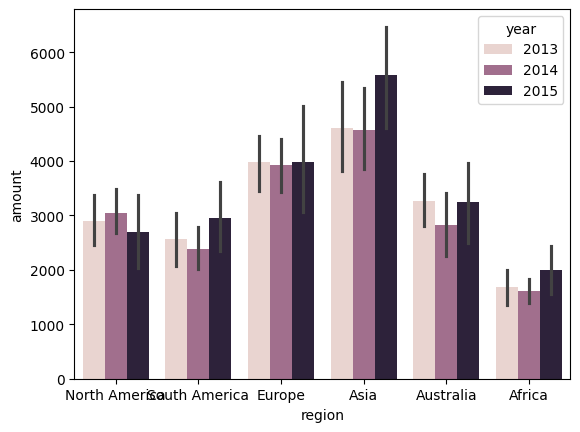

In [ ]:
def get_db_conn():
  return sqlite3.connect('sales.db')

def get_db_schema(db_name):
  conn = get_db_conn()

  # Get the schema of all tables
  schema = conn.execute("SELECT sql FROM sqlite_master;").fetchall()
  items = [items[0] for items in schema]

  # Join table schemas into a single string
  all_schemas = '\n'.join(items)
  print(all_schemas)

  return all_schemas

def get_data(sql):
  conn = get_db_conn()
  data = conn.execute(sql).fetchall()
  columns = [description[0] for description in conn.execute(sql).description]
  df = pd.DataFrame(data, columns=columns)

  display(df)
  return df



One-off Code to Convert JS array to JSON

In [ ]:
def js_array_to_json(js_file_path, json_file_path):
    # Read the JavaScript file
    with open(js_file_path, 'r') as file:
        js_content = file.read()

    # Extract the array content
    start_index = js_content.index('[')
    end_index = js_content.rindex(']') + 1
    array_content = js_content[start_index:end_index]

    # Replace JavaScript Date objects with ISO string
    array_content = re.sub(r'new Date\((.*?)\)', r'"\1"', array_content)

    # Add double quotes to property names and string values
    array_content = re.sub(r"(\w+):\s*'([^']*)'", r'"\1": "\2"', array_content)
    array_content = re.sub(r"(\w+):", r'"\1":', array_content)

    # Remove trailing commas
    array_content = re.sub(r',\s*}', '}', array_content)
    array_content = re.sub(r',\s*]', ']', array_content)

    # Parse the JSON array
    data = json.loads(array_content)

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Convert date strings to datetime objects, then to ISO format strings
    df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')

    # Convert DataFrame to dictionary
    data_dict = df.to_dict(orient='records')

    # Save to JSON file
    with open(json_file_path, 'w') as json_file:
        json.dump(data_dict, json_file, indent=2)

    print(f"Data has been saved to {json_file_path}")

    return df

# Usage
js_file_path = 'sales-data.js'  # Replace with the actual path to your JavaScript file
json_file_path = 'sale_data.json'
df = js_array_to_json(js_file_path, json_file_path)

# Display basic information about the DataFrame
print(df.info())

# save dataframe to sqlite db
conn = sqlite3.connect(db_name)
df.to_sql('sale', conn, if_exists='replace', index=False)

Data has been saved to sale_data.json
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       641 non-null    int64 
 1   region   641 non-null    object
 2   country  641 non-null    object
 3   city     641 non-null    object
 4   amount   641 non-null    int64 
 5   date     641 non-null    object
dtypes: int64(2), object(4)
memory usage: 30.2+ KB
None


641

## Data Analysis

CREATE TABLE "sale" (
"id" INTEGER,
  "region" TEXT,
  "country" TEXT,
  "city" TEXT,
  "amount" INTEGER,
  "date" TEXT
)


,id,region,country,city,amount,date
0,10248,North America,United States of America,New York,1740,2013-01-06T00:00:00
1,10249,North America,United States of America,Los Angeles,850,2013-01-13T00:00:00
2,10250,North America,United States of America,Denver,2235,2013-01-07T00:00:00
3,10251,North America,Canada,Vancouver,1965,2013-01-03T00:00:00
4,10252,North America,Canada,Edmonton,880,2013-01-10T00:00:00
...,...,...,...,...,...,...
636,10884,Australia,Australia,Sydney,2620,2015-05-17T00:00:00
637,10885,Australia,Australia,Melbourne,2400,2015-05-21T00:00:00
638,10886,Africa,South Africa,Pretoria,1740,2015-05-21T00:00:00
639,10887,Africa,Egypt,Cairo,500,2015-05-26T00:00:00


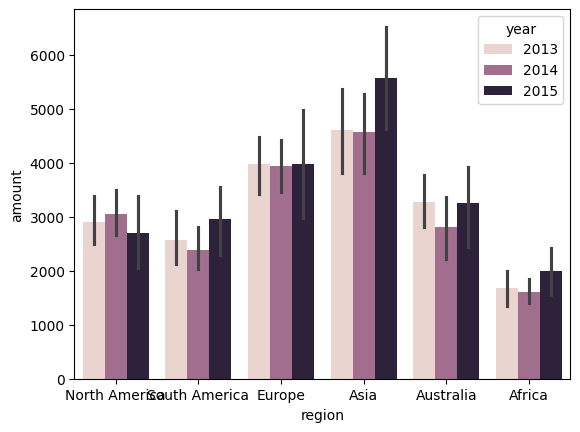

In [ ]:
def graph_sales_by_region(df):
  df['date'] = pd.to_datetime(df['date'])
  df['year'] = df['date'].dt.year
  sns.barplot(x='region', y='amount', hue='year', data=df)

db_schema = get_db_schema('sales.db')
df = get_data("SELECT * FROM sale")
graph_sales_by_region(df)